**Note:** a live version should be available here:  
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/birnstiel/applicants_test2/HEAD?filepath=questions.ipynb)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
au       = 1.496e13      # cm
M_sun    = 1.988e+33     # g
yr       = 3.15576e7     # s

# Question 1

An *axisymmetric* disk surface density profile is given in file `data.dat`. You can download this file [here](https://dl.dropboxusercontent.com/s/c00pl8niwbx1s0a/data.dat). The first column is the radial coordinate in cm, the second column the surface density density in g/cm$^2$.

Reading data

In [4]:
r, sig = np.loadtxt('data.dat').T

## a)
Calculate the total mass of this distribution in solar masses.

**My answer** : 

Because the disk is axisymmetric, so I treat it as a 2-D circular disk. 

With different surface density at different radius, the total disc mass can be computed by the following function:
$M_{disk}=\int_{r}^{} 2\pi r \Sigma \,dr$, 

$\Sigma$ is disk surface density profile at radius r.

The data profile in `data.dat` is discrete, so I need to integral the disk in the interval between 2 adjacent data points.

The function I use in the program then become:

$M_{disk}=\int_{r_1}^{r_2} 2\pi r \Sigma \,dr+\int_{r_2}^{r_3} 2\pi r \Sigma \,dr+......$ 

for all $r_i$ in `data.dat`.





Calculate total disk mass:

In [11]:
temp=np.pi*r[0]**2*sig[0]
for i in range(1,len(sig)):
    temp += np.pi*(r[i]**2-r[i-1]**2)*sig[i]  

M_disk = temp
print(f'disk mass = {M_disk / M_sun:.2g} M_sun')

disk mass = 0.05 M_sun


## b)
The profile follows the following function:

$\Sigma = \Sigma_c \left( \frac{r}{r_c} \right)^{-1} \, \exp\left( -\frac{r}{r_c} \right).$

What is the $r_c$ of this disk?

**My answer** : 

There is one parameter $\Sigma_c$ that I am not sure what it is. However, some literatures show that $\Sigma \propto \left( \frac{r}{r_c} \right)^{-1} \, \exp\left( -\frac{r}{r_c} \right)$ (Birnstiel et al. 2012; Lynden-Bell & Pringle 1974). 

Therefore, $\Sigma_c$ should be a constant.

I divide 2 functions with different $r$ and $\Sigma$ to let $\Sigma_c$ dissappear:

$$\frac{\Sigma_1}{\Sigma_2} = \frac{\left( \frac{r_1}{r_c} \right)^{-1} \, \exp\left( -\frac{r_1}{r_c} \right)}{\left( \frac{r_2}{r_c} \right)^{-1} \, \exp\left( -\frac{r_2}{r_c} \right)} .$$

After doing some arithmetics:

$$r_c=\frac{r_1-r_2}{\log \frac{r_2\Sigma_2}{r_1\Sigma_1}}$$

For any two pairs of $r_i$, $\Sigma_i$ in `data.dat`

Caculate $r_c$:

In [12]:
first=0    #first chosen data point
second=1   #sencond chosen data point

r_c =(r[first]-r[second])/np.log((r[second]*sig[second])/(r[first]*sig[first]))

print(f'r_c = {r_c / au:.2g} au')

r_c = 65 au


Different pairs of $r, \Sigma$:

In [13]:
first=200    #first chosen data point
second=300   #sencond chosen data point

r_c =(r[first]-r[second])/np.log((r[second]*sig[second])/(r[first]*sig[first]))

print(f'r_c = {r_c / au:.2g} au')

r_c = 65 au


# Question 2: Integration

Integrate the following equation forward in time:

$$\mathsf{\frac{d^2 z}{dt^2} + z \Omega^ 2 + \frac{dz}{dt} \, \frac{\Omega}{St} = 0}$$

The initial condition at $t=0$ is

\begin{align}
\mathsf{\Omega} &= \mathsf{1.991\times 10^{-7}\,1/s}\\
\mathsf{St}     &= \mathsf{100}\\
\mathsf{z}      &= \mathsf{0.1\,au}\\
\mathsf{v}      &= \mathsf{0.0 \,cm/s}
\end{align}

You can write your own integrator (first order is fine) or use available libraries.  

*Hint: you can split this second order equation into two coupled first order equations, one for $z(t)$ and one for $v(t) = \frac{dz}{dt}$.*

What is the value of $\mathsf{z} $ at $\mathsf{t=6} $ years? How about at $\mathsf{t = \infty}$ ?

In [20]:
omega = 1.991e-07  # 1/s
v     = 0.0        # cm/s
z     = 0.1 * au   # cm
St    = 100.0      # -
n_t   = 200
times = np.linspace(0.0, 6.0, n_t) * yr

**My answer** : 

According to the hint, I separate that second-order equation into two first order equations:

$\frac{dz}{dt}=v(t)$ 

and 

$\frac{dv}{dt}=-\Omega^2z(t)-\frac{\Omega}{St}v(t)$

**Solutoin 1** : I choose 4th order Runge-Kutta as my integration method (Referece: Burden, R. L., & Faires, J. D., *Numerical Analysis*, Pacific Grove, CA: Brooks/Cole Pub. Co):

In [21]:
temp=[]
a=0 *yr                    #integratoin in time interval [a,b]
b=6 *yr    
m=2                        #number of equations
N=n_t                      #choosing timestep
alpha=np.zeros(m)          #initial condition for z(0) and v(0)  
alpha[0]=z
alpha[1]=v

def f0(t,w0,w1):           #equation of dz/dt
    return w1
def f1(t,w0,w1):           #equation of dv/dt
    return -omega*omega*w0-omega/St*w1

#Runge-Kutta algorithm
def rk_sd(a,b,m,N,alpha):
    h=(b-a)/N
    t=a
    w=np.zeros(m)
    k=np.zeros((4,m))
    for i in range(m):
        w[i]=alpha[i]
    for i in range(N):
        for j in range(m):
            k[0,j]=h*eval('f'+str(j))(t,w[0],w[1])
        for j in range(m):
            k[1,j]=h*eval('f'+str(j))(t+h/2,w[0]+1.0/2*k[0,0],w[1]+1.0/2*k[0,1])
        for j in range(m):
            k[2,j]=h*eval('f'+str(j))(t+h/2,w[0]+1.0/2*k[1,0],w[1]+1.0/2*k[1,1])
        for j in range(m):
            k[3,j]=h*eval('f'+str(j))(t+h,w[0]+k[2,0],w[1]+k[2,1])
        for j in range(m):
            w[j]+=(k[0,j]+2*k[1,j]+2*k[2,j]+k[3,j])/6
        t=a+i*h
        temp.append(w[0])    

rk_sd(a,b,m,N,alpha)
solution=np.array(temp)

solution at 6 yr: z = 0.082816 au


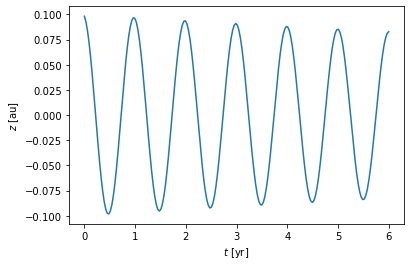

In [22]:
f, ax = plt.subplots()
ax.plot(times / yr, solution / au)
ax.set_xlabel('$t$ [yr]')
ax.set_ylabel('$z$ [au]')
print(f'solution at {times[-1] / yr:.2g} yr: z = {solution[-1] / au:.6f} au')

 I expect the function will converge when $t=\inf$, so I choose $t = 600 $ yr  and $n_t = 20000$ to compute the value the function converge to and rerun the program:

In [23]:
n_t   = 20000
times = np.linspace(0.0, 600.0, n_t) * yr
temp=[]
a=0 *yr                    #integratoin in time interval [a,b]
b=600 *yr    
m=2                        #number of equations
N=n_t                      #choosing timestep
alpha=np.zeros(m)          #initial condition for z(0) and v(0)  
alpha[0]=z
alpha[1]=v

def f0(t,w0,w1):           #equation of dz/dt
    return w1
def f1(t,w0,w1):           #equation of dv/dt
    return -omega*omega*w0-omega/St*w1

#Runge-Kutta algorithm
def rk_sd(a,b,m,N,alpha):
    h=(b-a)/N
    t=a
    w=np.zeros(m)
    k=np.zeros((4,m))
    for i in range(m):
        w[i]=alpha[i]
    for i in range(N):
        for j in range(m):
            k[0,j]=h*eval('f'+str(j))(t,w[0],w[1])
        for j in range(m):
            k[1,j]=h*eval('f'+str(j))(t+h/2,w[0]+1.0/2*k[0,0],w[1]+1.0/2*k[0,1])
        for j in range(m):
            k[2,j]=h*eval('f'+str(j))(t+h/2,w[0]+1.0/2*k[1,0],w[1]+1.0/2*k[1,1])
        for j in range(m):
            k[3,j]=h*eval('f'+str(j))(t+h,w[0]+k[2,0],w[1]+k[2,1])
        for j in range(m):
            w[j]+=(k[0,j]+2*k[1,j]+2*k[2,j]+k[3,j])/6
        t=a+i*h
        temp.append(w[0])    

rk_sd(a,b,m,N,alpha)
solution=np.array(temp)

solution at 6e+02 yr: z = 0.000000 au


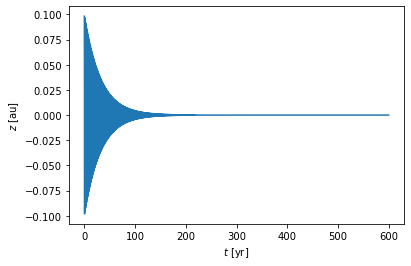

In [24]:
f, ax = plt.subplots()
ax.plot(times / yr, solution / au)
ax.set_xlabel('$t$ [yr]')
ax.set_ylabel('$z$ [au]')
print(f'solution at {times[-1] / yr:.2g} yr: z = {solution[-1] / au:.6f} au')

reset 

In [26]:
n_t   = 200
times = np.linspace(0.0, 6.0, n_t) * yr

**Solution 2** : I use odeint function from *scipy.integrate* to verify my result.

In [27]:
from scipy.integrate import odeint

def func(y,times,omega,St):    #functions
    z1,v1=y
    return np.array([v1,-omega*omega*z1-omega/St*v1])

temp = odeint(func, (z,v),times,args=(omega,St))
solution=temp[:,0]

solution at 6 yr: z = 0.082820 au


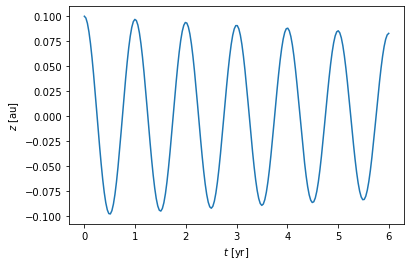

In [28]:
f, ax = plt.subplots()
ax.plot(times / yr, solution / au)
ax.set_xlabel('$t$ [yr]')
ax.set_ylabel('$z$ [au]')
print(f'solution at {times[-1] / yr:.2g} yr: z = {solution[-1] / au:.6f} au')

When t is very large:

In [38]:
n_t   = 20000
times = np.linspace(0.0, 600.0, n_t) * yr
temp = odeint(func, (z,v),times,args=(omega,St))
solution=temp[:,0]

solution at 6e+02 yr: z = 0.000000 au


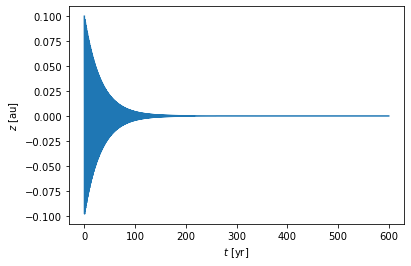

In [39]:
f, ax = plt.subplots()
ax.plot(times / yr, solution / au)
ax.set_xlabel('$t$ [yr]')
ax.set_ylabel('$z$ [au]')
print(f'solution at {times[-1] / yr:.2g} yr: z = {solution[-1] / au:.6f} au')